## Key questions to be answered:

In [ ]:
Do the number of notifications and the number of times the user opens an app have a correlation?
Does usage have a correlation with the number of notifications?

In [16]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#import warnings for presentation
import warnings
warnings.filterwarnings("ignore")
from PIL import Image

###### View the first few rows of the dataset¶

In [60]:
data.head(10)

,Date,Usage,Notifications,Times opened,App
0,2022-08-26,38,70,49,Instagram
1,2022-08-27,39,43,48,Instagram
2,2022-08-28,64,231,55,Instagram
3,2022-08-29,14,35,23,Instagram
4,2022-08-30,3,19,5,Instagram
5,2022-08-31,19,25,20,Instagram
6,2022-09-01,44,23,57,Instagram
7,2022-09-02,16,28,22,Instagram
8,2022-09-03,27,15,25,Instagram
9,2022-09-04,72,29,30,Instagram


In [10]:
data=pd.read_csv('./csvfiles/Screentime.csv')

In [44]:
#missing values
data.isnull().sum()

Date             0
Usage            0
Notifications    0
Times opened     0
App              0
dtype: int64

In [62]:
data.tail(10)

,Date,Usage,Notifications,Times opened,App
44,2022-09-12,182,290,172,Whatsapp
45,2022-09-13,71,153,91,Whatsapp
46,2022-09-14,64,192,67,Whatsapp
47,2022-09-15,50,181,58,Whatsapp
48,2022-09-16,71,176,91,Whatsapp
49,2022-09-17,212,212,120,Whatsapp
50,2022-09-18,244,303,132,Whatsapp
51,2022-09-19,77,169,105,Whatsapp
52,2022-09-20,58,190,78,Whatsapp
53,2022-09-21,89,262,68,Whatsapp


In [45]:
# shape of the dataset
data.shape

(54, 5)

In [13]:
#columns and their data types.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           54 non-null     object
 1   Usage          54 non-null     int64 
 2   Notifications  54 non-null     int64 
 3   Times opened   54 non-null     int64 
 4   App            54 non-null     object
dtypes: int64(3), object(2)
memory usage: 2.2+ KB


In [47]:
data['Date']=pd.to_datetime(data.Date,errors='coerce')
data['App'] = data.App.astype('category')

In [20]:
df = data.copy()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           54 non-null     datetime64[ns]
 1   Usage          54 non-null     int64         
 2   Notifications  54 non-null     int64         
 3   Times opened   54 non-null     int64         
 4   App            54 non-null     category      
dtypes: category(1), datetime64[ns](1), int64(3)
memory usage: 2.0 KB


In [91]:
# Let's look at the statistical summary of the data
df.describe()

,Usage,Notifications,Times opened
count,54.000000,54.000000,54.000000
mean,65.037037,117.703704,61.481481
std,58.317272,97.017530,43.836635
min,1.000000,8.000000,2.000000
25%,17.500000,25.750000,23.500000
50%,58.500000,99.000000,62.500000
75%,90.500000,188.250000,90.000000
max,244.000000,405.000000,192.000000


### Observations
1.Mean and max  of Notifications is high.
2.Usage,notifications and Times opened are correlated to each other.

# Exploratory Data Analysis (EDA)


###### Univariate analysis

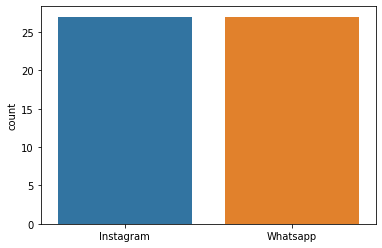

In [92]:
sns.countplot(data=df, x='App')
plt.xlabel(None)
plt.show()

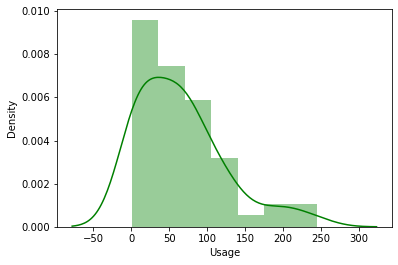

In [85]:
plot00=sns.distplot(df['Usage'],color='g')

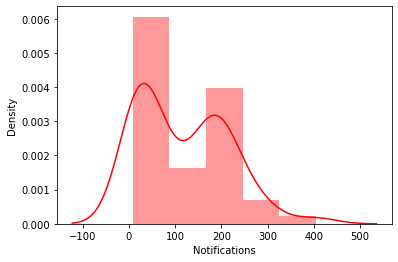

In [86]:
plot01=sns.distplot(df['Notifications'],color='r')

###### Bivariate Analysis¶

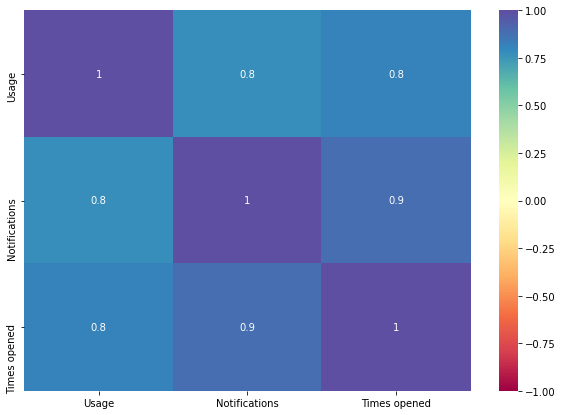

In [29]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,fmt='.1g',cmap="Spectral")
plt.show()

In [30]:
df.corr()

,Usage,Notifications,Times opened
Usage,1.000000,0.774452,0.816409
Notifications,0.774452,1.000000,0.882983
Times opened,0.816409,0.882983,1.000000


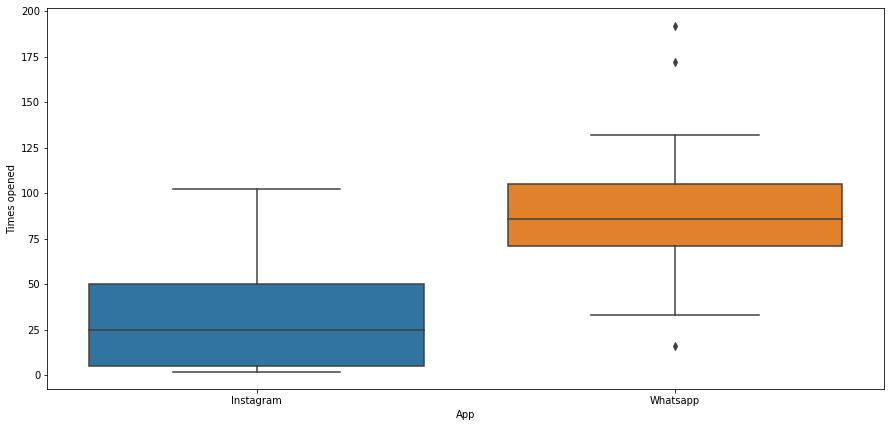

In [90]:
# Analyze the distribution of Usage
plt.figure(figsize=(15,7))

sns.boxplot(x='App', y='Times opened', data=df)
plt.show()

<AxesSubplot:xlabel='Notifications'>

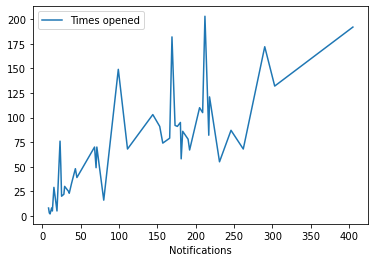

In [36]:
#trend plot
df[['Times opened','Notifications']].groupby(['Notifications']).sum().plot()

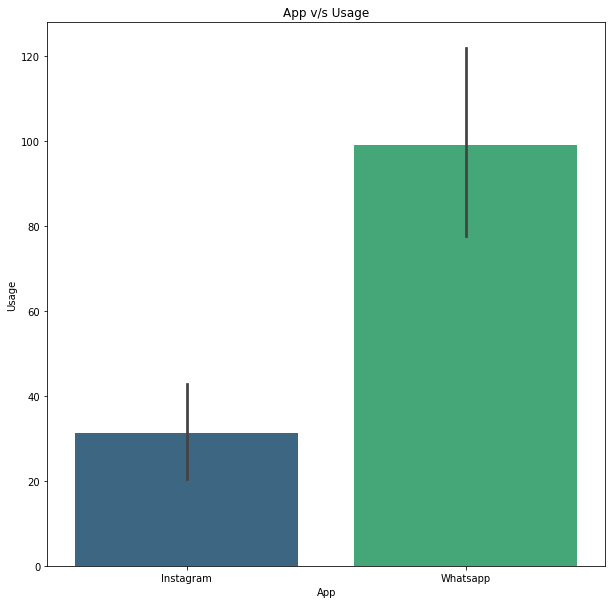

In [37]:
#barplot of App vs Usage
plt.figure(figsize=(10,10))
plt.title("App v/s Usage")
sns.barplot(x = 'App',
            y = 'Usage',
            palette = "viridis",
            data = df);

<AxesSubplot:xlabel='Usage', ylabel='Notifications'>

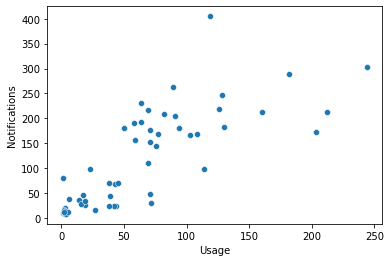

In [38]:
sns.scatterplot(data=df,x='Usage',y='Notifications')

In [41]:
data_app = df.groupby(['App','Notifications'], as_index=False)[['Times opened']].mean()

In [42]:
data_app

,App,Notifications,Times opened
0,Instagram,8,4.0
1,Instagram,9,3.0
2,Instagram,10,2.0
3,Instagram,11,5.0
4,Instagram,12,8.0
...,...,...,...
91,Whatsapp,246,87.0
92,Whatsapp,262,68.0
93,Whatsapp,290,172.0
94,Whatsapp,303,132.0


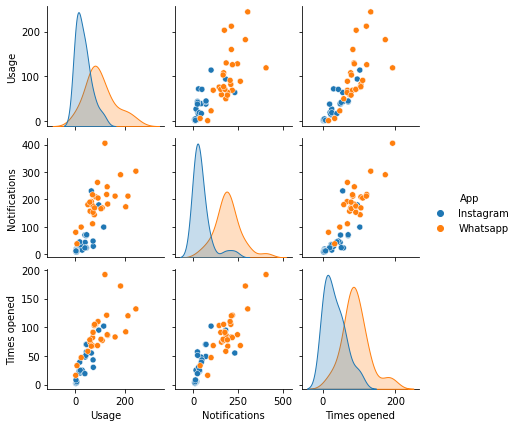

In [59]:

sns.pairplot(data, hue='App', height=2)

In [ ]:
WhatsApp is the most used App. Its usage increases  with the number of notifications.
Notifications and Times opened are correlated to each other.